In [74]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

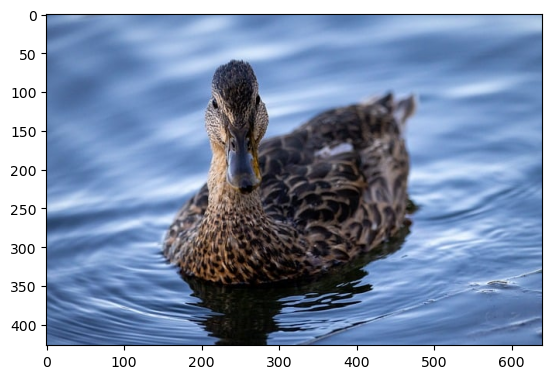

In [75]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [76]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """

    ## MY CODE
    ## define image and kernel height and width
    imHeight = im.shape[0]
    imWidth = im.shape[1]
    kernelHeight = kernel.shape[0]
    kernelWidth = kernel.shape[1]

    ## Ensure that kernel size is odd
    if kernelHeight%2==0 or kernelWidth%2 == 0:
        print("kernel dimensions are not odd!")

    ## Calculate border with to handle edge cases
    border_width = kernelHeight // 2

    ## zero padding
    im_padded = np.pad(im, ((border_width, border_width), (border_width, border_width), (0,0)), mode="constant")

    ## Create an output image with the same shape as the input
    im_out = np.zeros_like(im)

    ## iterate over each pixel in the input image  
    for i in range(imHeight):
        for j in range(imWidth):
            ## iterate to over rgb channels
            for channel in range(3): 
                px_out = 0.0
                # entering kernel
                for u in range(-border_width, border_width+1):
                    for v in range(-border_width, border_width+1):
                        px_out += im_padded[i+u + border_width, j+v + border_width, channel] * kernel[u+border_width, v+border_width]
                im_out[i, j, channel] = px_out
                        
    
        
    assert len(im.shape) == 3

    return im_out

In [77]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

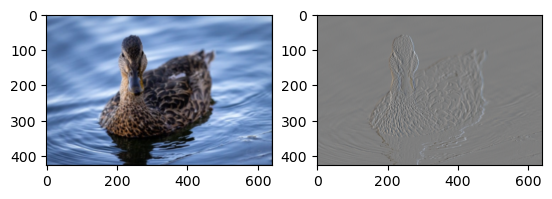

In [78]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()